# Abalone Age Prediction

**Progetto di Programmazione di Applicazioni Data Intensive**  
Corso di laurea triennale Ingegneria e Scienze Informatiche

**Albi Spahiu**  
albi.spahiu@studio.unibo.it

Anno accademico 2021/2022

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#per abilitare il rendering dei grafici all'interno del file Jupyter
%matplotlib inline

## 1a) Descrizione del problema  
[e comprensione dei dati, significato delle variabili, numero istanze, feature e
descrizione della variabile da predire (continua, se discreta binaria o multiclasse e relative classi) etc.]

- Gli abaloni sono grandi molluschi a rischio di estinzione che si trovano nelle acque fredde costiere di tutto il mondo
- Il _prezzo_ di un abalone è positivamente associato alla sua **età**
- Tuttavia, determinare l'età di un abalone richiede un processo manuale molto complesso 
  -  l'età dell'abalone viene determinata tagliando la conchiglia attraverso il cono, colorandola e contando il numero di anelli al microscopio
- Si vuole addestrare un modello che classifichi gli abaloni in `giovani` e `vecchi` sulla base delle sue misure fisiche

![immagine abalone](https://i.pinimg.com/736x/88/fd/0e/88fd0ea8830ef739e830439f8eff13c6--abalone-shell-sea-shells.jpg)

_Immagine abalone_

- Il set di dati "Abalone" utilizzato in questo progetto proviene dal Machine Learning Repository (si può trovare <a href="https://archive-beta.ics.uci.edu/ml/datasets/abalone">qui</a>)
- Questo set di dati è stato sviluppato nel 1995. Nonostante l'età di questo set di dati, i modelli predittivi che si possono ricavare da questo set di dati sono probabilmente ancora rilevanti per i giorni nostri  
  - Sono necessari da migliaia a milioni di anni per apportare cambiamenti significativi alle caratteristiche biologiche degli animali
- Pertanto, le caratteristiche biologiche dell'abalone in questo set di dati sono probabilmente ancora rilevanti oggi e da questo set di dati si possono ancora creare modelli predittivi significativi

- Importiamo i dati contenuti nel file "abalone.csv"

In [2]:
data = pd.read_csv("data/abalone.csv")

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.shape

(4177, 9)

In [5]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### Descrizione variabili

Come visto precedentemente, il dataset contiene 4177 righe e 9 colonne. Il data set è già stato privato dei valori mancanti e l'intervallo dei valori continui è stato scalato per essere utilizzato con una Rete Neurale Artificiale (dividendo per 200). Per ogni abalone abbiamo le seguenti _feature_:

- **Sex** : il sesso dell'Abalone, che può essere maschio (M), femmina (F) o neonato/infante (I).
- **Length** : misura della conciglia più lunga (in mm)
- **Diameter** : il diametro perpendicolare alla lunghezza (in mm)
- **Height** : con la carne nella conchiglia (in mm)
- **Whole weight** : peso abalone intero (in grammi)
- **Shucked weight** : peso della carne (in grammi)
- **Viscera weight** : peso del budello, dopo il dissanguamento (in grammi)
- **Shell weight** : peso della conchiglia dopo essere stata essiccata (in grammi)
- **Rings** : +1,5 indica l'età in anni

- `Rings` rappresenta implicitamente l'età dell'abalone
- Necessita però di alcune trasformazioni per ottenere la nostra variabile da predire `Age`

In [6]:
data["Age"] = data["Rings"] + 1.5
data.drop("Rings", axis=1, inplace=True)

In [17]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Old
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young


In [8]:
data["Age"].mean()

11.433684462532918

- Definiamo una funzione per mappare l'età del abalone, usando come soglia l'eta media degli abaloni:

In [9]:
def convert_age(age):
  if age >= 11.5:
    return 'Old'
  else:
    return 'Young'

In [10]:
data.Age = data.Age.apply(convert_age)

In [18]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,Old
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,Young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,Young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,Old
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,Young


## 1b) Analisi esplorativa dei dati
[ con distribuzioni, medie, stddev, percentili, numero valori distinti delle feature,
feature scarsamente utili perché identificatori o perché ad elevata/scarsa variabilità, valori mancanti, grafici a
dispersione, calcolo e visualizzazione della correlazione tra coppie di feature etc. In caso di mancanza o
insufficienti correlazioni, si può ripetere l’analisi anche con feature non lineari. ]

#### Tipi di dato e consumo di memoria

In [12]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   object 
dtypes: float64(7), object(2)
memory usage: 714.0 KB


- Le colonne `Sex` e `Age` sono considerate di tipo `object` in quanto stringa, ma sappiamo essere categoriche

In [13]:
data = data.astype({'Sex': 'category', 'Age': 'category'})
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Age             4177 non-null   category
dtypes: category(2), float64(7)
memory usage: 237.2 KB


- Facendone il casting otteniamo un DataFrame con gli stessi dati ma con occupazione di memoria ridotta di quasi 3 volte

In [14]:
data['Age'].unique()

['Old', 'Young']
Categories (2, object): ['Old', 'Young']

In [15]:
data['Sex'].unique()

['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']

- La variabile **Sex** comprende tre categorie: `femmina`, `maschio` e `neonato`. Si tratta di una componente curiosa del set di dati, poiché il sesso dell'abalone è in realtà binario (maschio o femmina). Pertanto, il neonato non è considerato un sesso dell'abalone, ma si riferisce invece alla sua età.  
Questo potrebbe rappresentare una potenziale limitazione nel modello predittivo, di cui parleremo più avanti.
- L'abalone di sesso diverso ha una composizione corporea diversa con valori economici distinti.

#### Statistiche di base

- Con `describe` otteniamo le statistiche di base per le colonne numeriche

In [16]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


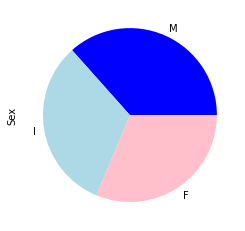

In [10]:
data["Sex"].value_counts().plot.pie(colors=["blue", "lightblue", "pink"]);

In [14]:
data["Sex"].value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

In [9]:
data["Rings"].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

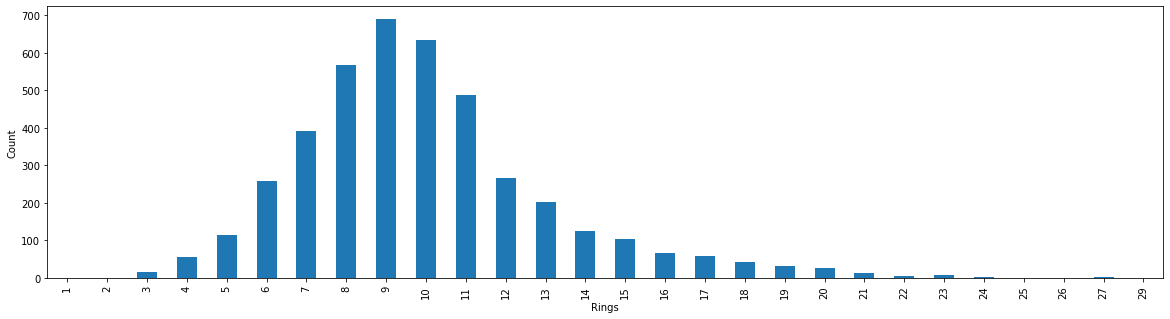

In [11]:
plt.figure(figsize=(20, 5))
plt.xlabel("Rings")
plt.ylabel("Count");
data["Rings"].value_counts().sort_index().plot.bar();


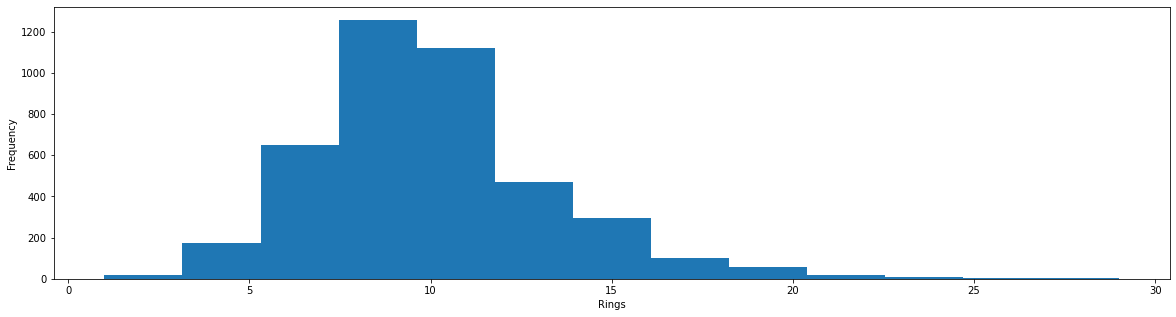

In [12]:
plt.figure(figsize=(20, 5))
plt.xlabel("Rings")
plt.ylabel("Count");
data["Rings"].sort_index().plot.hist(bins=13);

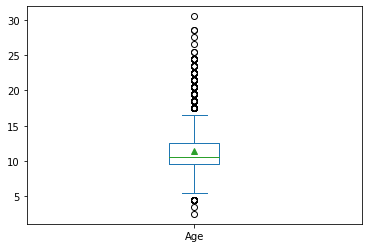

In [ ]:
data["Age"].plot.box(showmeans=True);

- Il rettangolo evidenzia che il 50\% "centrale" dei conti è tra i 15\\$ **(25%)** e i 25\\$ **(75%)** circa
- Il triangolo (~20\\$) e la linea centrale (~18\\$) indicano rispettivamente **media** e **mediana (50%)**
- I "baffi" indicano il **minimo** (~2\\$) e il **massimo** (~40\\$) dei dati "ordinari"
- I valori molto fuori dalla norma (_outlier_) sono mostrati come cerchi esterni ai baffi

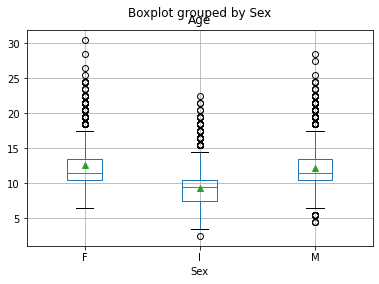

In [25]:
data.boxplot(column="Age", by="Sex", showmeans=True);

## ALTRI LAB

## Divisione training-validation con scikit-learn

- Abbiamo visto il metodo _hold-out_ in cui i dati disponibili sono divisi in training e validation set
- scikit-learn fornisce un'apposita funzione `train_test_split` per suddividere casualmente un set di dati in due insiemi "train" e "test" disgiunti
  - il set di dati è una sequenza di elementi, es. array NumPy o serie/frame pandas
  - con l'opzione `test_size=X` si indica la proporzione (se X decimale tra 0 e 1) o il numero di elementi (se X intero) da inserire nel test (default 0.25, ovvero 25\%)
  - tutti i dati non selezionati per il test sono implicitamente selezionati per il train
  - con l'opzione `random_state` si indica un seed per la riproducibilità: richiamando la funzione più volte con `random_state` e altri parametri uguali viene riprodotta esattamente la stessa suddivisione
- Ad esempio, dividiamo il frame `housing` in due parti `train_data` e `val_data`, contenenti rispettivamente 2/3 e 1/3 dei dati

In [ ]:
from sklearn.model_selection import train_test_split
y = data["Age"]
X = data.drop(columns=["Age"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

## 2) Normalizzazione e rilevazione delle feature più rilevanti
[ 2) normalizzazione/standardizzazione (necessarie ad esempio per evitare la prevalenza fittizia di feature con
domini più grandi e difficoltà poi di interpretazione del modello o delle feature più rilevanti), discretizzazione,
binarizzazione delle feature, individuazione con lasso - nel caso di regressione - delle feature più rilevanti ed
eventuali collinearità (nella classificazione utilizzare la regolarizzazione con norma L1 per individuare le
feature più rilevanti), oppure in caso di scarsa efficacia predittiva utilizzare anche feature non lineari come al
punto 1b; l’efficacia predittiva con solo le feature più rilevanti può essere confrontata generando modelli che
usano tutte le feature, anche usando altri algoritmi trattati a lezione. ]

## 3) Generazione di modelli di learning

3) generazione di diversi modelli di learning usando tutti gli algoritmi visti a lezione che siano applicabili al
caso di studio prescelto impiegando random search e grid search in k (nested) cross fold validation allo
scopo di individuare gli iperparametri migliori in modo corretto. Nel caso le classi del problema prescelto
siano sbilanciate, applicare uno o più metodi per il trattamento di tali casi.

## 4) Valutazione dei modelli
[ 4) valutazione dei modelli di regressione, classificazione, recommendation con le metriche appropriate,
selezione dei 2-3 modelli ritenuti migliori con motivazione della scelta, tra cui anche lo scarto quadratico
medio dell’errore dei relativi iperparametri ottenuto in k cross fold validation. Valutazione dei modelli a
regime con calcolo degli intervalli di confidenza predittivi fissata la confidenza del 95%. ]

## 5) Modello migliore 

[ 5) Designare dall’analisi precedente il modello migliore, se si differenzia dagli altri 2-3, e spiegare
/interpretare la conoscenza appresa attraverso l'analisi dei parametri appresi (coefficienti degli iperpiani), sia
nella regressione, sia nella classsificazione, vale a dire quali feature sono più positivamente/negativamente
correlate ed in che misura con la variabile da predire.

_Ad esempio nella previsione dei consumi energetici trattata in aula e in lab, quanto i consumi dipendono
dalla temperatura e quanto dal giorno della settimana, oppure nel caso di studio dei prezzi delle case
quali sono le variabili che più influiscono sul prezzo ed in che misura lo aumentano/diminuiscono. Altro
esempio: da un problema di classificazione volto a determinare la fascia delle spese di manutenzione
previste di automobili, emerge che all’aumentare dell’età delle vetture non si rilevano aumenti
significativi della fascia di spesa, invece l’incremento della mancanza di manutenzione negli anni
precedenti comporta l’aumento delle spese di manutenzione per l’anno successivo. I coefficienti devono
essere denormalizzati/destandardizzati per poterli interpretare nei domini originali (argomento trattato a
lezione nella regressione che vale anche nella classificazione)_ . ]

---


Da ogni fase si può tornare a ripetere quelle precedenti in caso di esito insoddisfacente, dove per
insoddisfacente intendiamo che l’efficacia del modello predittivo (F1-Measure nella classificazione oppure R2
o MAE nella regressione) sia statisticamente equivalente, con confidenza del 99%, a quella di un modello
casuale. Se per il dataset prescelto è nota la migliore efficacia, allora confrontarla in modo corretto con il
proprio esito.

---
La relazione deve contenere i 5 punti sopra indicati e può essere incorporata passo dopo
passo nel file jupyter oppure in un pdf a parte di 4-5 pagine.
Il candidato/team deve consegnare: sorgente, pdf ed html del file jupyter commentato, la relazione ed i dati
utilizzati, con almeno 5 giorni di anticipo rispetto alla prova orale, salvo diversa indicazione in almaesami,
mediante condivisione con bitbucket o GitHub con relativo link per l'esecuzione del codice in colab o binder.